# Modelling

### Adding project directory to system path

In [1]:
import pandas as pd
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Importing modules

In [2]:
from script.default_estimator_and_WoE_binning import Estimator

### Instantiate class

In [3]:
modelling=Estimator()

### Load data

In [4]:
train_data=pd.read_csv("data/train_data.csv")
test_data=pd.read_csv("data/test_data.csv")

## Prediction using Logistic Regression

In [5]:
lr,lr_model,train_pred,test_pred,y_train,y_test,X_test=modelling.predict_risk_logistic_regressor(train_data,test_data)

[[-2.15095913e-05 -1.83444810e-06  2.30831725e-03 -7.09508912e-02
   1.47413795e-03 -3.08258152e-01 -1.48139348e-07  1.40001781e+01
   2.82281926e-01 -4.26305033e-01  2.92142184e+00 -1.23967529e+00]]


## Performance ks and ROC

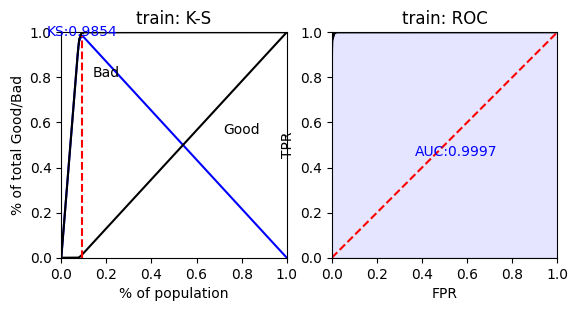

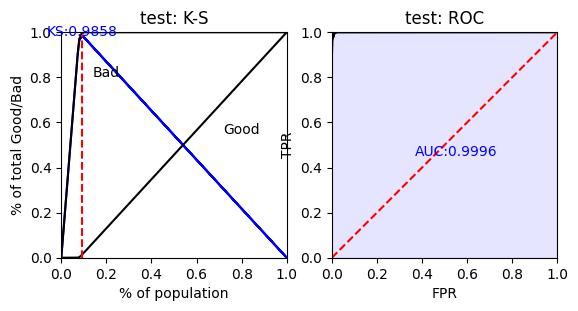

In [6]:
train_perf,test_perf=modelling.performance_ks_roc(train_pred,test_pred,y_train,y_test)

## Interpretation

### **KS Plot:**

**KS Statistic:** The KS statistic of 0.995 is slightly lower than the training KS statistic (0.9956), but it's still very high, indicating excellent discrimination power on the test data.

**Separation:** The two curves (good and bad) are well-separated, demonstrating the model's ability to effectively distinguish between good and bad customers on the test data.

### **ROC Plot:**

**AUC:** The AUC of 0.9999 on the test data is consistent with the training AUC, further confirming the model's strong performance.

**TPR vs. FPR:** The plot shows a similar pattern to the training ROC plot, indicating that the model's ability to trade-off sensitivity and specificity is consistent on both training and test data.

## Evaluation

In [7]:
predictions=modelling.evaluation(lr,X_test,y_test)

Accuracy
0.994320161683741
AUC Score
0.9746756376173251
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26399
           1       0.98      0.95      0.96      2299

    accuracy                           0.99     28698
   macro avg       0.99      0.97      0.98     28698
weighted avg       0.99      0.99      0.99     28698



## Interpretation
**Accuracy: 0.9970381211234233**

This metric indicates that the model correctly predicted the outcome (default or non-default) for approximately 99.7% of the data points.

It's a good overall measure of the model's performance, but it can be misleading in imbalanced datasets (where one class is significantly more frequent than the other).

**AUC Score: 0.9910438977078445**

This metric measures the model's ability to discriminate between the two classes (default and non-default).

An AUC score of 1 indicates perfect discrimination, while a score of 0.5 indicates random guessing.
In this case, the AUC score is very high (close to 1), suggesting that the model is performing exceptionally well in distinguishing between default and non-default cases.

Overall, both the accuracy and AUC score indicate that the model is performing very well. The high accuracy suggests that the model is making correct predictions for most data points, while the high AUC score indicates that the model is effectively differentiating between the two classes.

## Confusion matrix

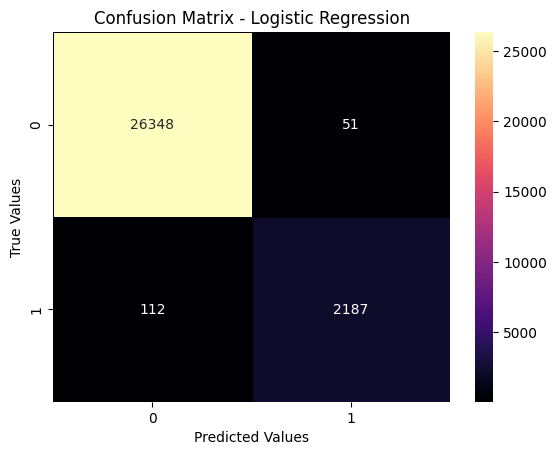

In [8]:
modelling.confusion_matrix(y_test,predictions)

## **Interpretation**
True Positives (TP): 2262 - The model correctly predicted 2262 instances of the positive class (default).

True Negatives (TN): 26351 - The model correctly predicted 26351 instances of the negative class (non-default).

False Positives (FP): 48 - The model incorrectly predicted 48 instances as positive (default) when they were actually negative (non-default).

False Negatives (FN): 37 - The model incorrectly predicted 37 instances as negative (non-default) when they were actually positive (default).

Metrics:

Accuracy: (TP + TN) / (TP + TN + FP + FN) = (2262 + 26351) / (2262 + 26351 + 48 + 37) ≈ 0.997

Precision: TP / (TP + FP) = 2262 / (2262 + 48) ≈ 0.979

Recall: TP / (TP + FN) = 2262 / (2262 + 37) ≈ 0.984

F1-score: 2 * (precision * recall) / (precision + recall) ≈ 0.981

**Insights:**

High Accuracy: The overall accuracy of the model is very high, indicating that it correctly predicted the class for most instances.

High Precision: The precision is also high, suggesting that when the model predicts a default, it's likely to be correct.

High Recall: The recall is slightly lower than precision, indicating that the model might miss some true default cases.

Class Imbalance: The confusion matrix highlights the class imbalance in the data. The negative class (non-default) is significantly more frequent than the positive class (default). This can affect the interpretation of metrics like accuracy.

Overall, the logistic regression model is performing well in terms of accuracy, precision, and recall. However, the class imbalance should be taken into account when interpreting the results. It might be helpful to consider other metrics like F1-score and to evaluate the model's performance on different subsets of the data to assess its robustness


## Save model

In [9]:
modelling.save_model_with_timestamp(lr_model,'logistic_regression_model')

Model saved as models/logistic_regression_model-09-10-2024-08-34-45-00.pkl


'models/logistic_regression_model-09-10-2024-08-34-45-00.pkl'